##**Music Effects on Mental Health**

###**Abstract**

The objective of the dataset is to explore potential correlations between an individual's musical preferences and their self-reported mental well-being. Discovering these connections could enhance the thoughtful implementation of Music Therapy or offer intriguing insights into the human mind. My questions for this dataset would be "Can the genre of music we listen to impact our mental health?" and "Do genres such as hip-hop and classical music exert distinct effects?" The dataset contains information on age, streaming service preferences, prevalent mental health disorders, their perceived severity, and whether individuals believe music influences their mental well-being. I aim to establish a connection between the music genres people frequently listen to and their mental health state during music sessions. My goal is to identify genres that can alleviate the impact of mental illnesses and pinpoint which ones to avoid when mental health is compromised.

###**Outline**
I plan to analyze my dataset by first uploading it. The initial step involves cleaning the data, which includes removing unnecessary columns and addressing any Null values. Once the data is cleaned, I will utilize various plots to identify relationships within the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I'm importing the following libraries that I will use to work with my data

In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mxmh_survey_results.csv")

In [ ]:
df.dtypes #prints out the data types of the columns

Timestamp                      object
Age                           float64
Primary_streaming_service      object
Hours_per_day                 float64
While_working                  object
Instrumentalist                object
Composer                       object
Fav_genre                      object
Exploratory                    object
Foreign_languages              object
BPM                           float64
Frequency_Classical            object
Frequency_Country              object
Frequency_EDM                  object
Frequency_Folk                 object
Frequency_Gospel               object
Frequency_Hip_hop              object
Frequency_Jazz                 object
Frequency_K_pop                object
Frequency_Latin                object
Frequency_Lofi                 object
Frequency_Metal                object
Frequency_Pop                  object
Frequency_R&B                  object
Frequency_Rap                  object
Frequency_Rock                 object
Frequency_Vi

This is my dataset, without me cleaning it up

In [ ]:
df.head() #helps view the first few rows of data

,Timestamp,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
#dropping columns that I will not need to perform the analysis
to_drop = ['Instrumentalist', 'Composer', 'Exploratory', 'Timestamp','Permissions']
df.drop(to_drop, inplace=True, axis=1)

The dataset after I removed the columns

In [ ]:
#viewing the changes made to the dataframe
df.head()

,Age,Primary_streaming_service,Hours_per_day,While_working,Fav_genre,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,...,Frequency_Pop,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
0,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,Rock,No,119.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,Video game music,Yes,132.0,Never,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,Jazz,Yes,84.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,R&B,No,107.0,Never,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


This function returns a boolean value to see which entries are null

In [ ]:
df.isnull()

,Age,Primary_streaming_service,Hours_per_day,While_working,Fav_genre,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,...,Frequency_Pop,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Drops the rows that contain null values in the Age column and Music Effects column

Null values exist in the BPM column; however, these values will receive limited analysis

In [ ]:
df.dropna(subset=['Age','Music_effects'],inplace=True)

In [ ]:
df

,Age,Primary_streaming_service,Hours_per_day,While_working,Fav_genre,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,...,Frequency_Pop,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18.0,Spotify,4.0,No,Video game music,Yes,132.0,Never,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,Jazz,Yes,84.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,R&B,No,107.0,Never,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Rock,Yes,120.0,Very frequently,Rarely,Never,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Pop,Yes,160.0,Rarely,Rarely,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,Rap,No,120.0,Rarely,Sometimes,Sometimes,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Classical,No,170.0,Very frequently,Never,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


###**PCA and Plots**

####**Question 1**

I am replacing the values in the While_working column to convert it into numerical values.

In [ ]:
df['While_working'].replace(['Yes','No'],[1,0],inplace=True)
df.head()

,Age,Primary_streaming_service,Hours_per_day,While_working,Fav_genre,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,...,Frequency_Pop,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18.0,Spotify,4.0,0.0,Video game music,Yes,132.0,Never,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,1.0,Jazz,Yes,84.0,Sometimes,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,1.0,R&B,No,107.0,Never,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,1.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,1.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


Creating a new DataFrame with numerical values from the original

In [ ]:
df2 = df[['Age','Hours_per_day', 'While_working','BPM']]
df2.head()

,Age,Hours_per_day,While_working,BPM
2,18.0,4.0,0.0,132.0
3,61.0,2.5,1.0,84.0
4,18.0,4.0,1.0,107.0
5,18.0,5.0,1.0,86.0
6,18.0,3.0,1.0,66.0


I am using the apply() function to center the values of each column in the replicated DataFrame. I created a method to iterate through df2 to find the mean of columns.

In [ ]:
df2_centered = df2.apply(lambda x: x-x.mean())
df2_centered

,Age,Hours_per_day,While_working,BPM
2,-7.143054,0.407772,-0.788966,-1.602555e+06
3,35.856946,-1.092228,0.211034,-1.602603e+06
4,-7.143054,0.407772,0.211034,-1.602580e+06
5,-7.143054,1.407772,0.211034,-1.602601e+06
6,-7.143054,-0.592228,0.211034,-1.602621e+06
...,...,...,...,...
731,-8.143054,-1.592228,0.211034,-1.602567e+06
732,-7.143054,-2.592228,0.211034,-1.602527e+06
733,-6.143054,2.407772,0.211034,-1.602567e+06
734,-6.143054,1.407772,0.211034,-1.602517e+06


In [ ]:
df2_centered.mean()

Age              1.563780e-16
Hours_per_day   -3.518506e-16
While_working    1.837611e-17
BPM             -1.910405e-10
dtype: float64

Compute the pairwise covariance among the series of a DataFrame. It will return the covariance matrix of the columns of the DataFrame.

In [ ]:
cov_matrix = df2.cov()
cov_matrix

,Age,Hours_per_day,While_working,BPM
Age,1.422770e+02,-1.453501e+00,-0.357314,-1.401409e+07
Hours_per_day,-1.453501e+00,9.245046e+00,0.349701,5.259911e+06
While_working,-3.573138e-01,3.497012e-01,0.166729,3.303174e+05
BPM,-1.401409e+07,5.259911e+06,330317.387997,1.602564e+15


Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. It will return the DataFrame but the columns and rows will be switched.

In [ ]:
df2_transposed = df2.T
df2_transposed

,2,3,4,5,6,7,8,9,10,11,...,726,727,728,729,730,731,732,733,734,735
Age,18.0,61.0,18.0,18.0,18.0,21.0,19.0,18.0,18.0,19.0,...,18.0,26.0,14.0,21.0,21.0,17.0,18.0,19.0,19.0,29.0
Hours_per_day,4.0,2.5,4.0,5.0,3.0,1.0,6.0,1.0,3.0,8.0,...,18.0,1.0,7.0,0.5,2.0,2.0,1.0,6.0,5.0,2.0
While_working,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
BPM,132.0,84.0,107.0,86.0,66.0,95.0,94.0,155.0,NaN,125.0,...,90.0,136.0,108.0,95.0,147.0,120.0,160.0,120.0,170.0,98.0


The method will compute the matrix multiplication between the DataFrame and the transposed version of the dataframe. It will return the multiplied result of both dataframes, which will be a square matrix.

In [ ]:
df2_dot = df2.dot(df2_transposed)
df2_dot

,2,3,4,5,6,7,8,9,10,11,...,726,727,728,729,730,731,732,733,734,735
2,17764.0,12196.00,14464.0,11696.0,9048.0,12922.0,12774.0,20788.0,NaN,16874.0,...,12276.0,18424.0,14536.0,12920.00,19790.0,16154.0,21448.0,16206.0,22802.0,13466.0
3,12196.0,10784.25,10097.0,8335.5,6650.5,9264.5,9071.0,14121.5,NaN,11680.0,...,8704.0,13013.5,9944.5,9262.25,13635.0,11123.0,14541.5,11255.0,15452.5,10007.0
4,14464.0,10097.00,11790.0,9547.0,7399.0,10548.0,10425.0,16914.0,NaN,13750.0,...,10027.0,15025.0,11837.0,10545.00,16116.0,13155.0,17449.0,13207.0,18553.0,11017.0
5,11696.0,8335.50,9547.0,7746.0,6016.0,8554.0,8457.0,13660.0,NaN,11133.0,...,8155.0,12170.0,9576.0,8550.50,13031.0,10637.0,14090.0,10693.0,14988.0,8961.0
6,9048.0,6650.50,7399.0,6016.0,4690.0,6652.0,6565.0,10558.0,NaN,8617.0,...,6319.0,9448.0,7402.0,6649.50,10087.0,8233.0,10888.0,8281.0,11578.0,6997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,16154.0,11123.00,13155.0,10637.0,8233.0,11760.0,11616.0,18909.0,NaN,15340.0,...,11143.0,16765.0,13213.0,11758.00,18002.0,14694.0,19509.0,14736.0,20734.0,12258.0
732,21448.0,14541.50,17449.0,14090.0,10888.0,15580.0,15389.0,25126.0,NaN,20351.0,...,14743.0,22230.0,17540.0,15578.50,23901.0,19509.0,25926.0,19549.0,27548.0,16205.0
733,16206.0,11255.00,13207.0,10693.0,8281.0,11806.0,11678.0,18949.0,NaN,15410.0,...,11251.0,16821.0,13269.0,11802.00,18052.0,14736.0,19549.0,14798.0,20792.0,12324.0
734,22802.0,15452.50,18553.0,14988.0,11578.0,16555.0,16372.0,26698.0,NaN,21652.0,...,15733.0,23620.0,18662.0,16551.50,25400.0,20734.0,27548.0,20792.0,29287.0,17222.0


In [ ]:
df2_dot.sum()

2      1.320104e+11
3      8.400739e+10
4      1.070085e+11
5      8.600689e+10
6      6.600535e+10
           ...     
731    1.200095e+11
732    1.600126e+11
733    1.200095e+11
734    1.700134e+11
735    9.800797e+10
Length: 727, dtype: float64

####**Question 2**

Converting the covarience matrix into a numpy array

In [ ]:
a = np.array(cov_matrix)
a

array([[ 1.42277028e+02, -1.45350103e+00, -3.57313774e-01,
        -1.40140929e+07],
       [-1.45350103e+00,  9.24504627e+00,  3.49701181e-01,
         5.25991085e+06],
       [-3.57313774e-01,  3.49701181e-01,  1.66728901e-01,
         3.30317388e+05],
       [-1.40140929e+07,  5.25991085e+06,  3.30317388e+05,
         1.60256370e+15]])

In [ ]:
eigenvalues, eigenvectors = LA.eig(a)

Printing out the eigenvalues of the array

In [ ]:
eigenvalues

array([1.60256370e+15, 1.42170283e+02, 9.22600567e+00, 1.52632599e-01])

Printing out the eigenvectors of the array

In [ ]:
eigenvectors

array([[-8.74479622e-09,  9.99940710e-01,  1.06815753e-02,
         2.11687760e-03],
       [ 3.28218553e-09, -1.05933005e-02,  9.99219372e-01,
        -3.80582327e-02],
       [ 2.06118101e-10, -2.52174700e-03,  3.80335514e-02,
         9.99273281e-01],
       [ 1.00000000e+00,  8.77956662e-09, -3.19405416e-09,
        -6.25425079e-11]])

Putting the covarience matrix in the PCA method. It will display the explained variance ratio.

In [ ]:
pca = PCA(n_components=2)
pca.fit(cov_matrix)


PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 7.09510999e-27]


This will display the singular values of the PCA.

In [ ]:
print(pca.singular_values_)

[1.38786088e+15 1.16902958e+02]


####**Question 3**

I plotted the streaming services to see which one was the most popular.

Text(0, 0.5, '')

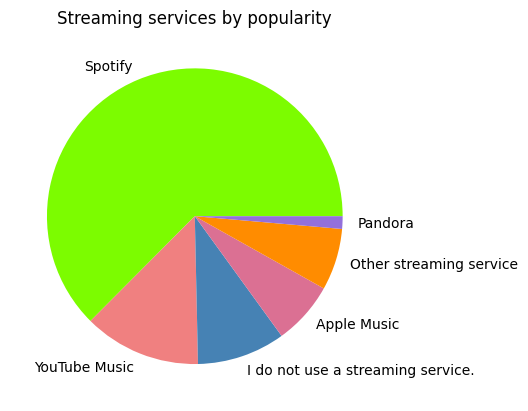

In [ ]:
s_colors = ['lawngreen', 'lightcoral', 'steelblue', 'palevioletred', 'darkorange', 'mediumpurple']

services = df['Primary_streaming_service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

This boxplot depicts the streaming service people used, based off their age range.

Text(0.5, 1.0, 'Streaming services by Age')

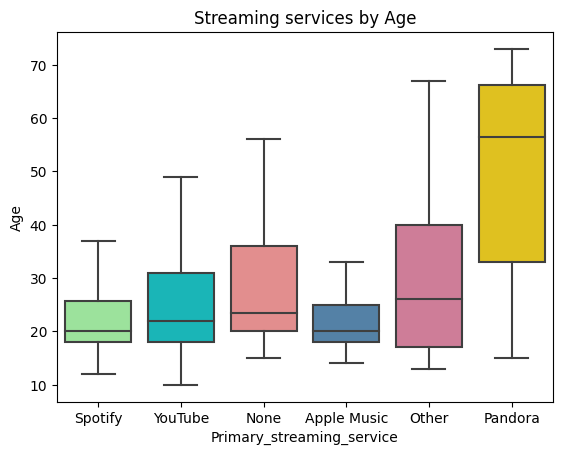

In [ ]:
s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary_streaming_service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

The histogram shows how many hour a day they listen to music.

array([[<Axes: title={'center': 'Hours_per_day'}>]], dtype=object)

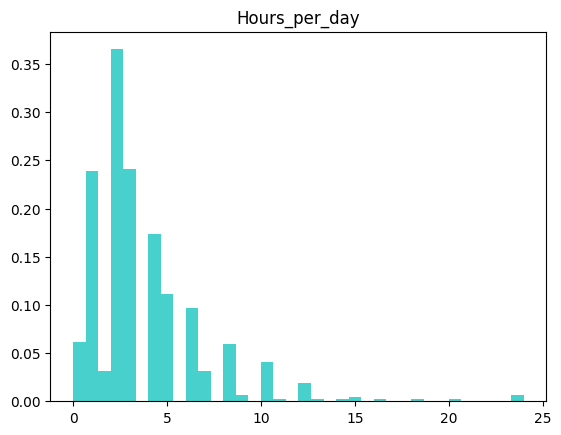

In [ ]:
df.hist(['Hours_per_day'], bins='auto', density=True, color = 'mediumturquoise', grid=False)

This plot divides the mental health issues, and divides them further on how severe they believe their mental health is.

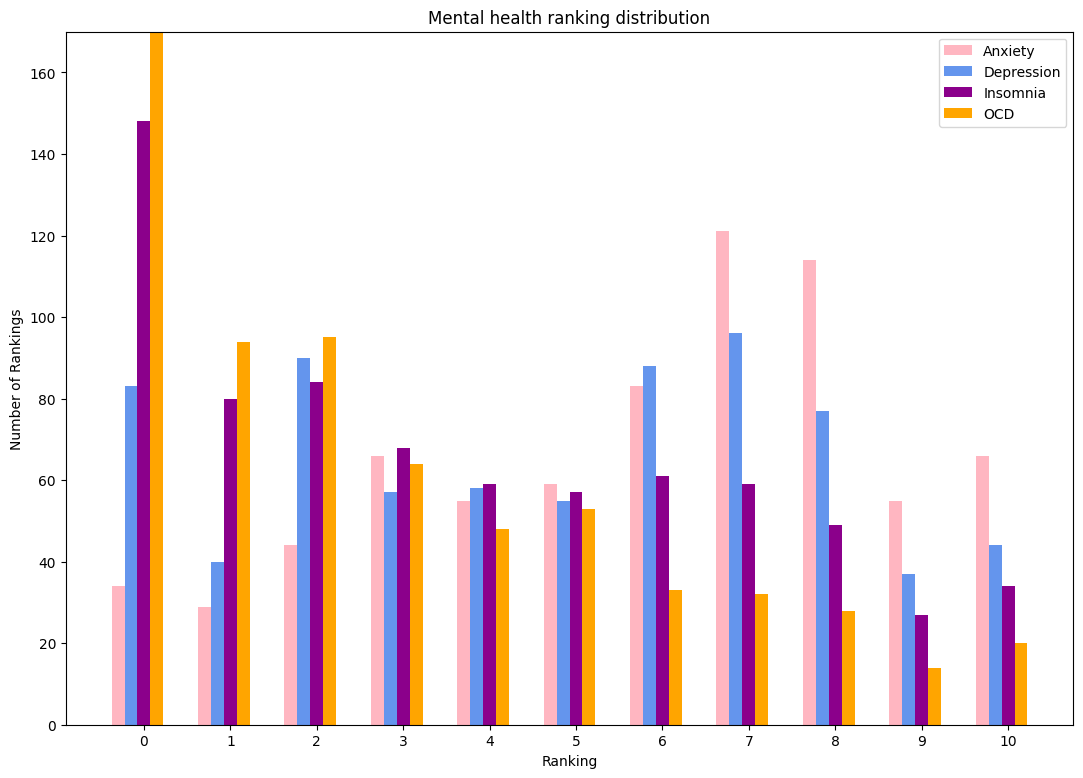

In [ ]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

The plot illustrates individuals who have indicated experiencing severe symptoms of the mental health issues mentioned. It compares this data with the number of hours they spend listening to music each day.

<ipython-input-30-f6017da70938>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
<ipython-input-30-f6017da70938>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
<ipython-input-30-f6017da70938>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or spec

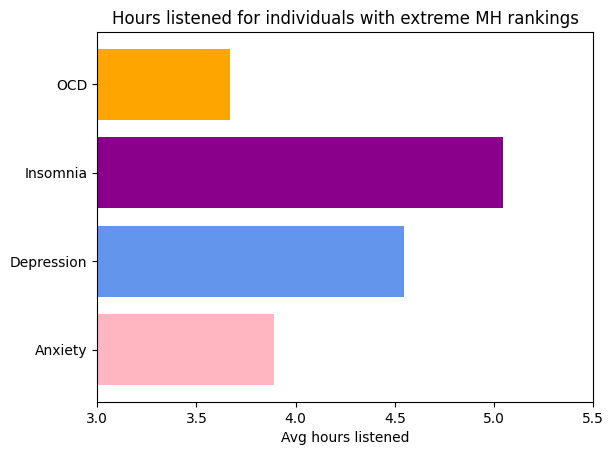

In [ ]:
anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))

plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme MH rankings")
plt.xlim(3,5.5)
plt.show()

The plot illustrates individuals who have indicated experiencing mild symptoms of the mental health issues mentioned. It compares this data with the number of hours they spend listening to music each day.

<ipython-input-31-b833721ad2fa>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
<ipython-input-31-b833721ad2fa>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
<ipython-input-31-b833721ad2fa>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or sp

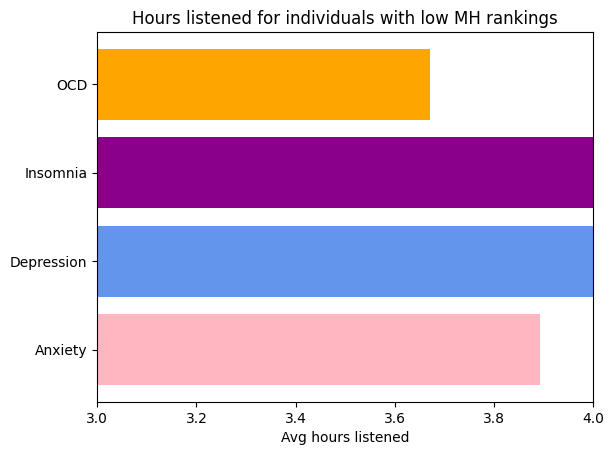

In [ ]:
anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
insomnia_extreme2 = df.loc[(df['Insomnia'] < 3)].mean()[1]
ocd_extreme2 = df.loc[(df['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))

plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3,4)
plt.show()

This pie chart shows if people believe that music effects their mental health.

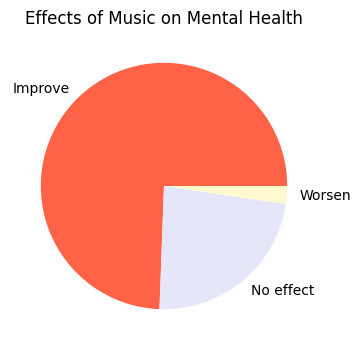

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music_effects'].value_counts()
effects.plot(kind='pie', colors = ["tomato", "lavender", "lemonchiffon"], ylabel= '');

The pie chart shows the distribution of the popular genres people listen to.

Text(0, 0.5, '')

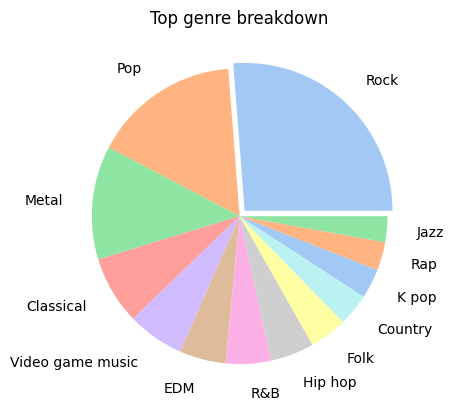

In [ ]:
genre = df["Fav_genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2,
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,],
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

The scatter plot shows the age distribution by the genre of music they listen to the most.

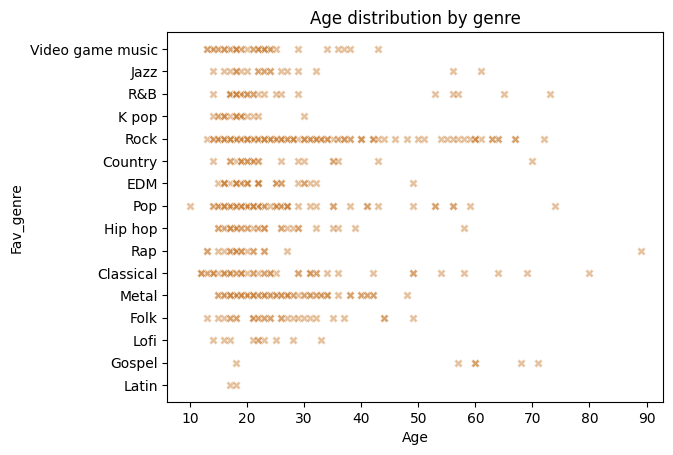

In [ ]:
sns.scatterplot(data=df, y="Fav_genre", x="Age", alpha = 0.5, marker = "X", color = "peru")
plt.title('Age distribution by genre');

This line of code finds the minimum and maximum BPM.

In [ ]:
df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

220.0
40.0


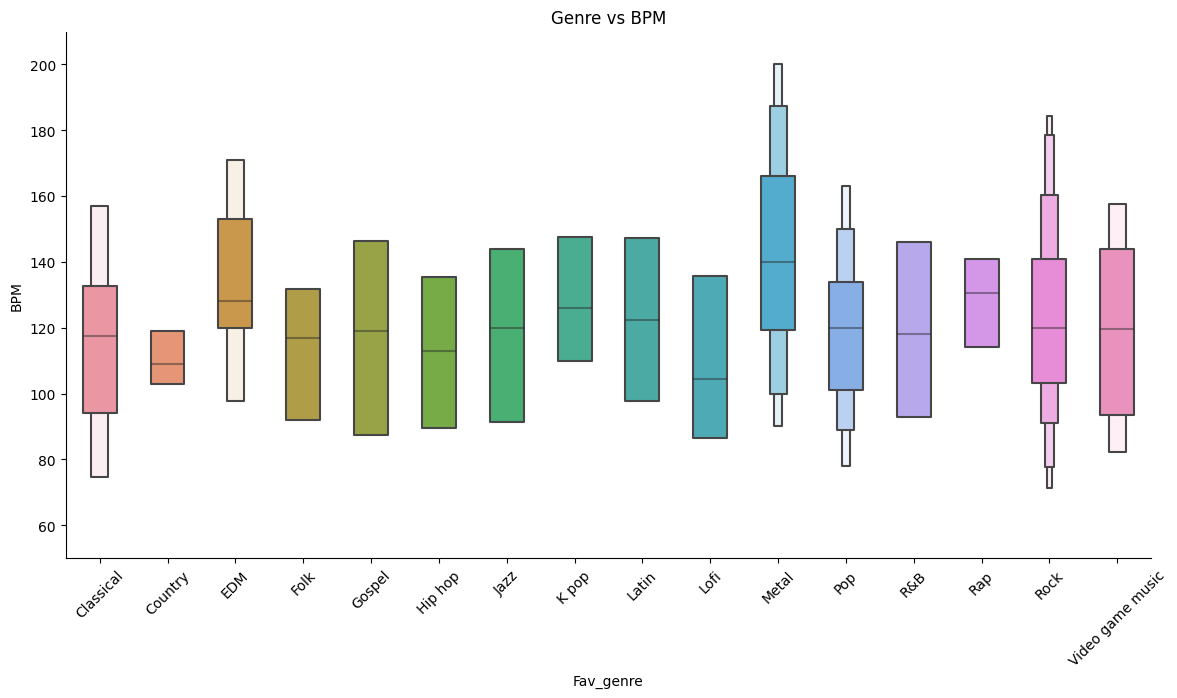

In [ ]:
sns.catplot(
    data=df.sort_values("Fav_genre"),
    x="Fav_genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

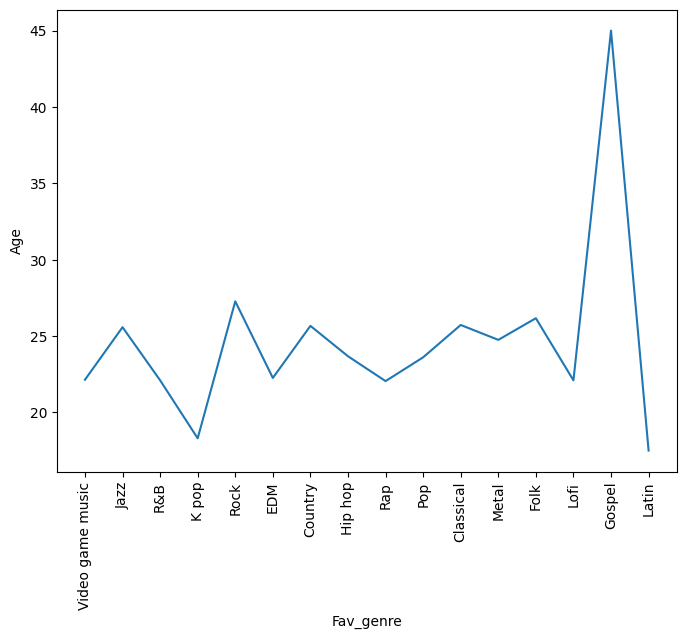

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['Fav_genre'], y=df['Age'], errorbar=None)
plt.xticks(rotation=90);

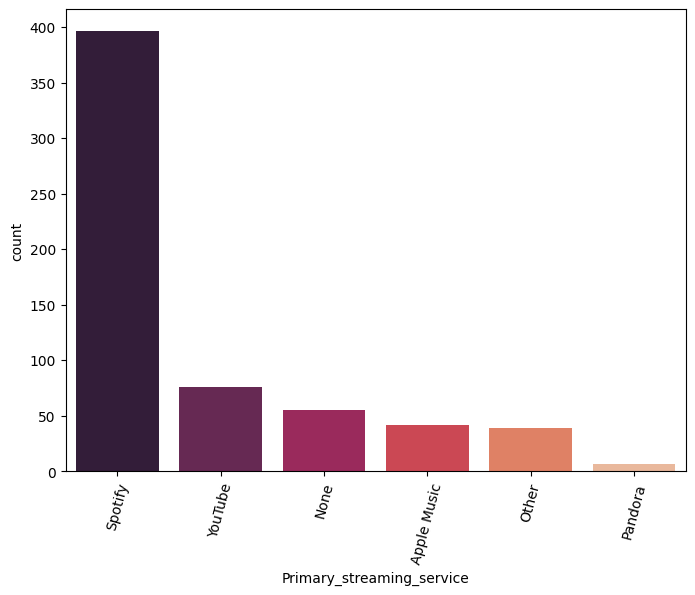

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Primary_streaming_service'],palette='rocket')
plt.xticks(rotation=75);

Text(0.5, 0, 'Classical Music')

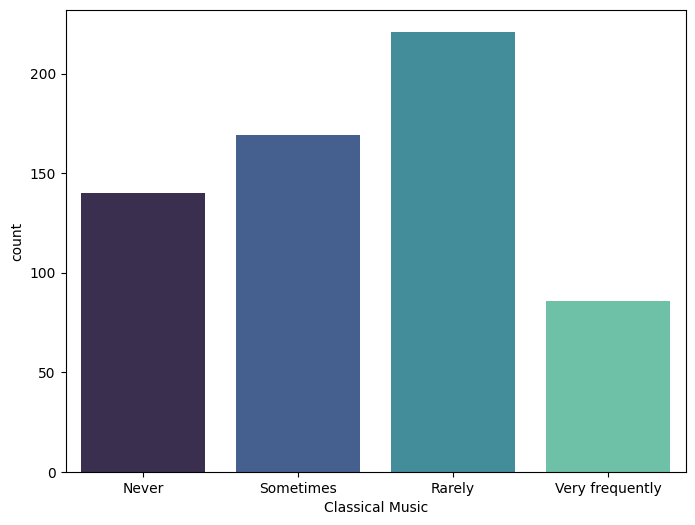

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency_Classical'],palette='mako')
plt.xlabel('Classical Music')

Text(0.5, 0, 'Rap Music')

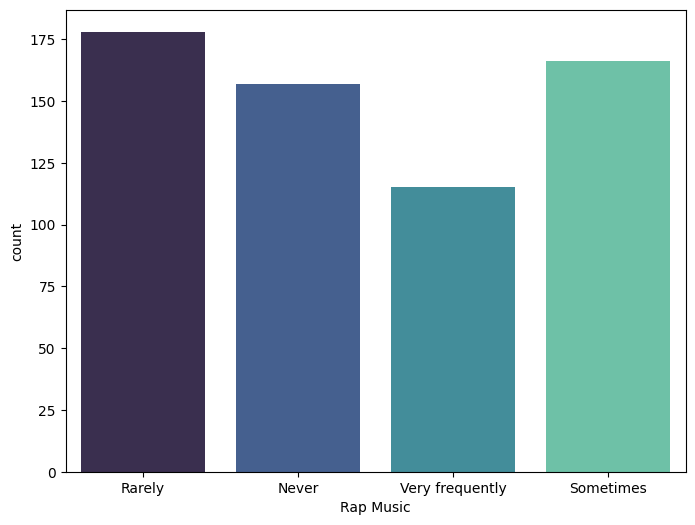

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency_Rap'],palette='mako')
plt.xlabel('Rap Music')

Text(0.5, 0, 'EDM Music')

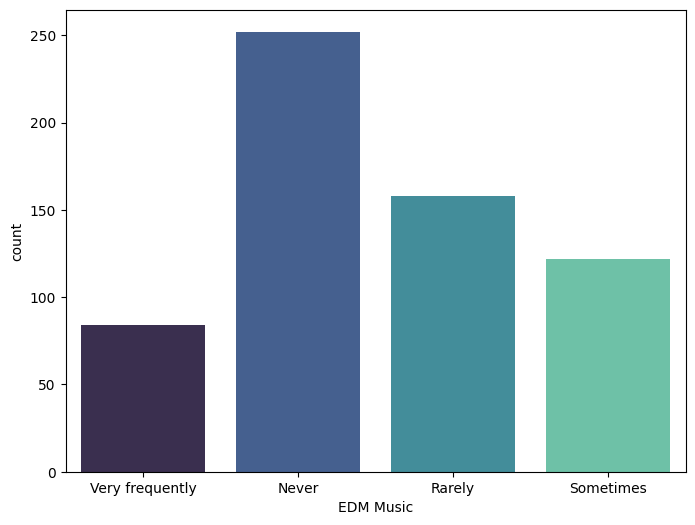

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency_EDM'],palette='mako')
plt.xlabel('EDM Music')

Text(0.5, 0, 'Gospel Music')

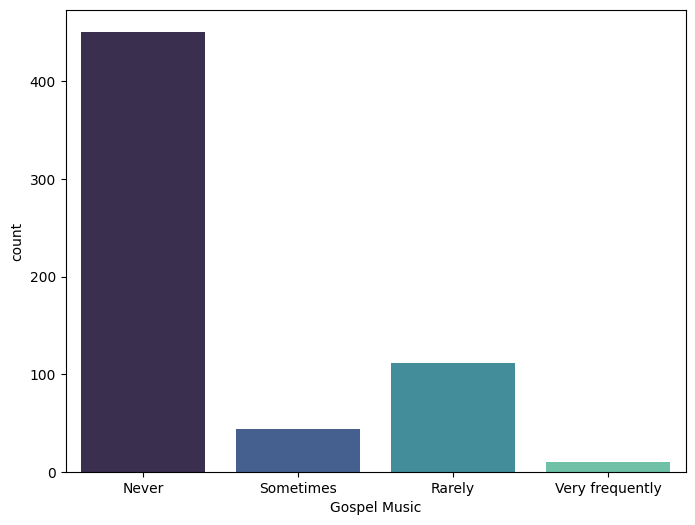

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency_Gospel'],palette='mako')
plt.xlabel('Gospel Music')

Text(0.5, 0, 'Hip hop Music')

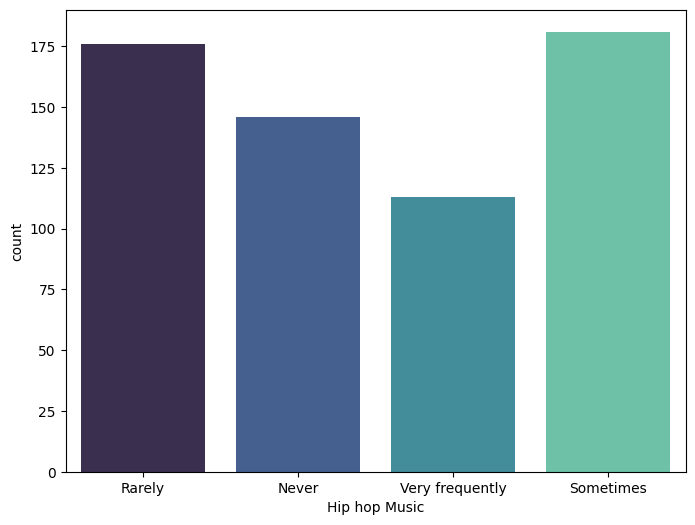

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Frequency_Hip_hop'],palette='mako')
plt.xlabel('Hip hop Music')

<Axes: title={'center': 'Anxiety'}, xlabel='Fav_genre'>

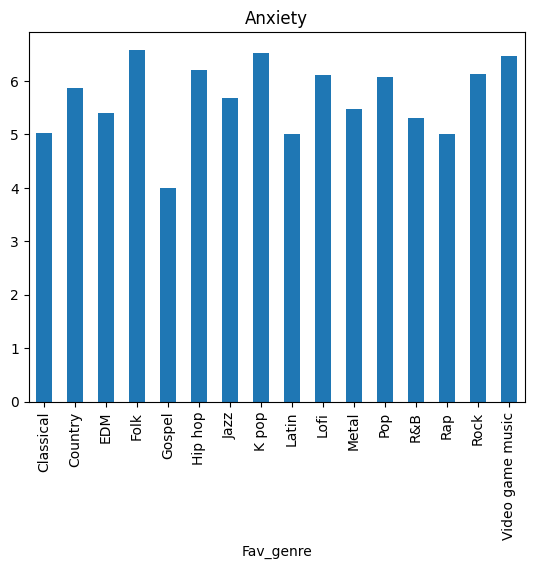

In [ ]:
anxiety_music =  df.groupby(['Fav_genre'])['Anxiety'].mean()

anxiety_music.plot.bar(title='Anxiety')

<Axes: title={'center': 'Depression'}, xlabel='Fav_genre'>

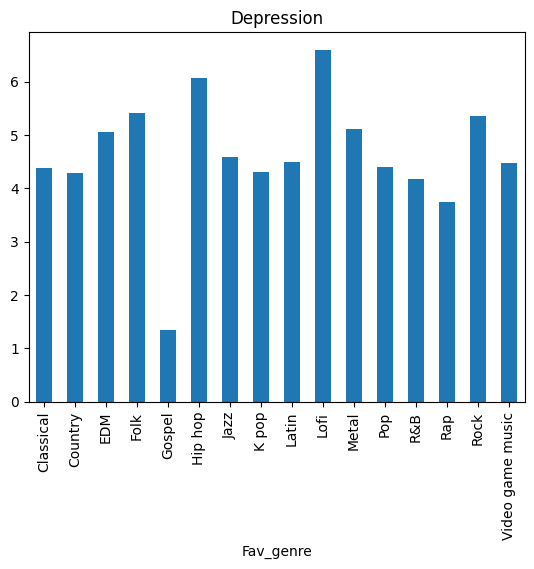

In [ ]:
depression_music =  df.groupby(['Fav_genre'])['Depression'].mean()

depression_music.plot.bar(title='Depression')

<Axes: title={'center': 'Insomnia'}, xlabel='Fav_genre'>

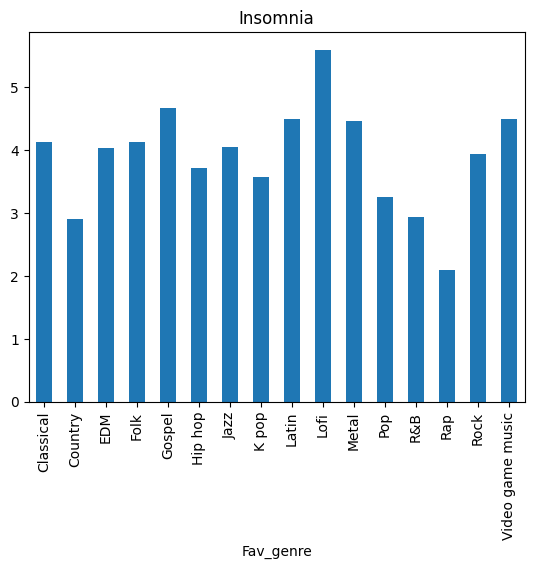

In [ ]:
insomnia_music =  df.groupby(['Fav_genre'])['Insomnia'].mean()

insomnia_music.plot.bar(title='Insomnia')

<Axes: title={'center': 'OCD'}, xlabel='Fav_genre'>

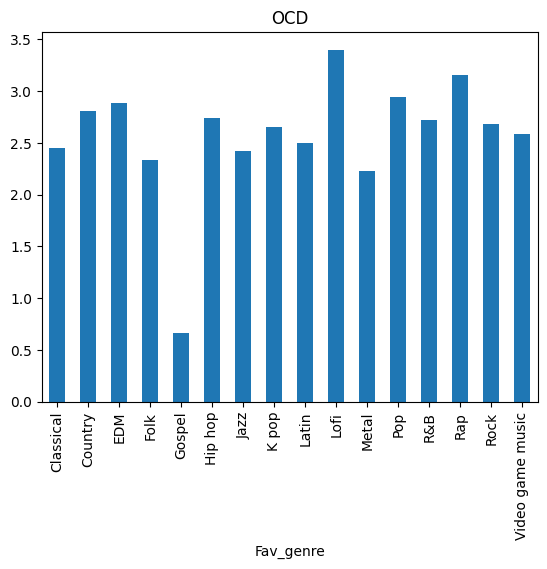

In [ ]:
ocd_music =  df.groupby(['Fav_genre'])['OCD'].mean()

ocd_music.plot.bar(title='OCD')

In [ ]:
df['Frequency_Classical'].replace(['Never','Rarely','Sometimes','Very frequently'],[0,1,2,3],inplace=True)
df.head()

<ipython-input-48-4fa2b52880c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency_Classical'].replace(['Never','Rarely','Sometimes','Very frequently'],[0,1,2,3],inplace=True)


,Age,Primary_streaming_service,Hours_per_day,While_working,Fav_genre,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,...,Frequency_Pop,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18.0,Spotify,4.0,0.0,Video game music,Yes,132.0,0,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube,2.5,1.0,Jazz,Yes,84.0,2,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,1.0,R&B,No,107.0,0,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,1.0,Jazz,Yes,86.0,1,Sometimes,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube,3.0,1.0,Video game music,Yes,66.0,2,Never,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [ ]:
df['Frequency_Rap'].replace(['Never','Rarely','Sometimes','Very frequently'],[0,1,2,3],inplace=True)
df.head()

<ipython-input-49-f1a7c9aad00b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency_Rap'].replace(['Never','Rarely','Sometimes','Very frequently'],[0,1,2,3],inplace=True)


,Age,Primary_streaming_service,Hours_per_day,While_working,Fav_genre,Foreign_languages,BPM,Frequency_Classical,Frequency_Country,Frequency_EDM,...,Frequency_Pop,Frequency_R&B,Frequency_Rap,Frequency_Rock,Frequency_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18.0,Spotify,4.0,0.0,Video game music,Yes,132.0,0,Never,Very frequently,...,Rarely,Never,1,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube,2.5,1.0,Jazz,Yes,84.0,2,Never,Never,...,Sometimes,Sometimes,0,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,1.0,R&B,No,107.0,0,Never,Rarely,...,Sometimes,Very frequently,3,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,1.0,Jazz,Yes,86.0,1,Sometimes,Never,...,Very frequently,Very frequently,3,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube,3.0,1.0,Video game music,Yes,66.0,2,Never,Rarely,...,Rarely,Rarely,0,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


<Axes: xlabel='Frequency_Classical', ylabel='Depression'>

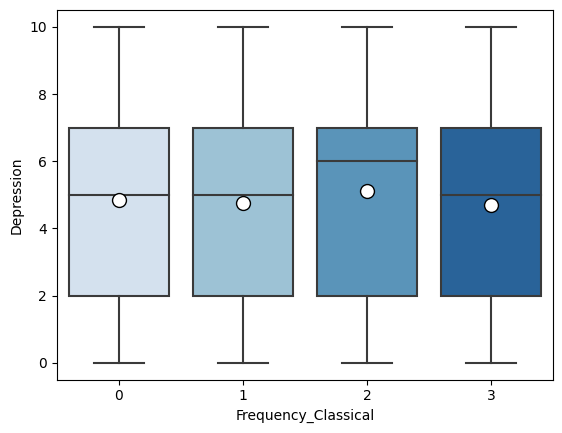

In [ ]:
sns.boxplot(data=df, x='Frequency_Classical',y='Depression',palette='Blues',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [ ]:
avg_depression = df['Depression'].mean()

<Axes: xlabel='Frequency_Rap', ylabel='Depression'>

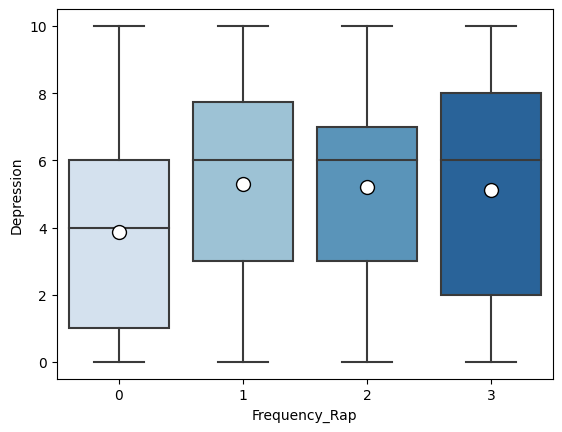

In [ ]:
sns.boxplot(data=df, x='Frequency_Rap',y='Depression',palette='Blues',showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

<Axes: title={'center': 'Depression'}, xlabel='Frequency_Rap'>

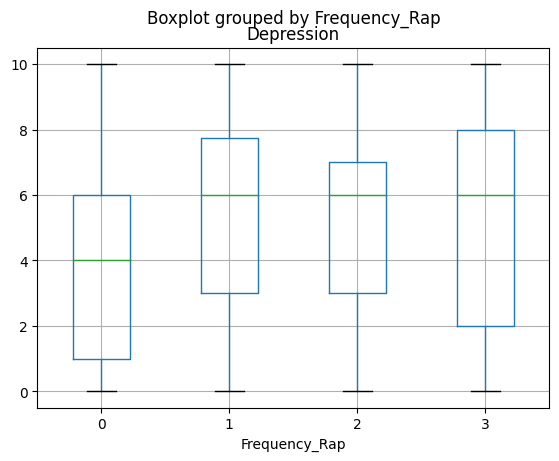

In [ ]:
df.boxplot(column= 'Depression',by='Frequency_Rap')

<Axes: title={'center': 'Depression'}, xlabel='Frequency_Classical'>

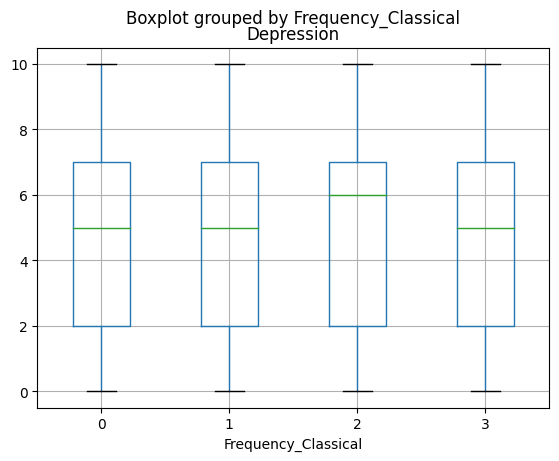

In [ ]:
df.boxplot(column= 'Depression',by='Frequency_Classical')

##**Statistical test**

-1: Perfectly negative linear correlation between two variables.
0: No linear correlation between two variables.
1: Perfectly positive linear correlation between two variables.

In [ ]:
df.describe()

,Age,Hours_per_day,While_working,BPM,Frequency_Classical,Frequency_Rap,Anxiety,Depression,Insomnia,OCD
count,616.000000,616.000000,615.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,24.590909,3.734091,0.796748,123.762987,1.326299,1.387987,5.867695,4.873377,3.822240,2.659091
std,11.373690,3.105976,0.402746,32.119933,0.977315,1.059430,2.758716,2.995830,3.105669,2.847595
min,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000,100.000000,1.000000,0.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.000000,120.000000,1.000000,1.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,1.000000,144.000000,2.000000,2.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000,220.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000


importing stats packages

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

This function will return the Pearson correlation coefficient between columns Fequency_Classical and Frequency_Rap along with the corresponding p-value that tells us whether or not the correlation coefficient is statistically significant

Very strong evidence against the null hypothesis

In [ ]:
pearsonr(df['Depression'],df['Frequency_Rap'])

PearsonRResult(statistic=0.13769078940974264, pvalue=0.0006107628864535112)

No evidence against the null hypothesis

In [ ]:
pearsonr(df['Depression'],df['Frequency_Classical'])

PearsonRResult(statistic=0.008858683648214122, pvalue=0.8263194052630951)

In [ ]:
group1 = df[df['Fav_genre']=='Rap']
group2 = df[df['Fav_genre']=='Classical']

In [ ]:
ttest_ind(group1['Depression'], group2['Depression'])

TtestResult(statistic=-0.7485462635117206, pvalue=0.45715558556965985, df=58.0)